# Titanic - Machine Learning from Disaster


## Machine Learning Workflow

1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


## Features

The Titanic got sunken on **April 15th, 1912**, which caused deaths of **1502 / 2224** passengers and sailors.

In this dataset, I will use the main *12 features** as follows:

Variable | Name	Description 
--- | --- 
Survived |	Survived (1) or died (0)
Pclass |	Passenger's class
Name	| Passenger's name
Sex	| Passenger's sex
Age	| Passenger's age
SibSp	| Number of siblings/spouses aboard
Parch	| Number of parents/children aboard
Ticket	| Ticket number
Fare	| Fare
Cabin	| Cabin
Embarked	| Port of embarkation





## Dataset

https://www.kaggle.com/c/titanic/data

In [ ]:
import warnings
import json
import sys
import csv
import os


import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import numpy as np
np.random.seed(1612)

In [ ]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis(EDA)
*   Data Collection
*   Visualization
*   Data Preprocessing
*   Data Cleaning

<img src="http://s9.picofile.com/file/8338476134/EDA.png">

## Data Collection

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


><font color="red"><b>Note: </b></font>

* Another names for **column**: observation, sample, example, instance, record
* Another names for **row**: feature, attribute

### Print 5 rows randomly

In [ ]:
df_train.sample(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S


### Get a statistical report

In [ ]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## Visualization


**Filter unique values of features**

FInd out categorical columns (PClass) instead of continuous ones (Price).

In [ ]:
# Print out all unique values
print('Pclass unique values: ', df_train.Pclass.unique())
print('SibSp unique values: ', df_train.SibSp.unique())
print('Parch unique values: ', df_train.Parch.unique())
print('Sex unique values: ', df_train.Sex.unique())
print('Cabin unique values: ', df_train.Cabin.unique())

Pclass unique values:  [3 1 2]
SibSp unique values:  [1 0 3 4 2 5 8]
Parch unique values:  [0 1 2 5 3 4 6]
Sex unique values:  ['male' 'female']
Cabin unique values:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30

### Count unique values

In [ ]:
print(df_train['Pclass'].value_counts())
print(df_train['SibSp'].value_counts())
print(df_train['Parch'].value_counts())

# I will not print the Cabin's unique values since it has too many values

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [ ]:
print(df_train['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


### Count Plot

#### **Survived vs Sex**

Text(0.5, 1.0, 'Number of passengers Survived by Sex')

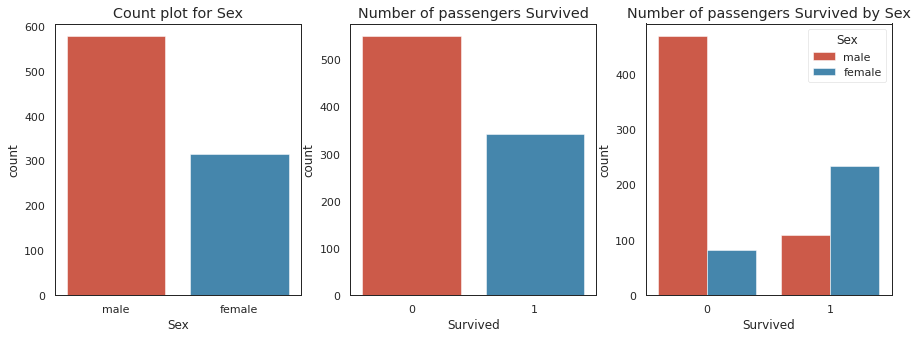

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(df_train.Sex)
plt.title('Count plot for Sex')

plt.subplot(1,3,2)
sns.countplot(df_train.Survived) # input DataFrame.Column name
plt.title('Number of passengers Survived')

plt.subplot(1,3,3)
sns.countplot(x="Survived", hue="Sex", data=df_train)
plt.title('Number of passengers Survived by Sex')

#### **Survived vs Pclass**

Text(0.5, 1.0, 'Number of passengers Survived by Pclass')

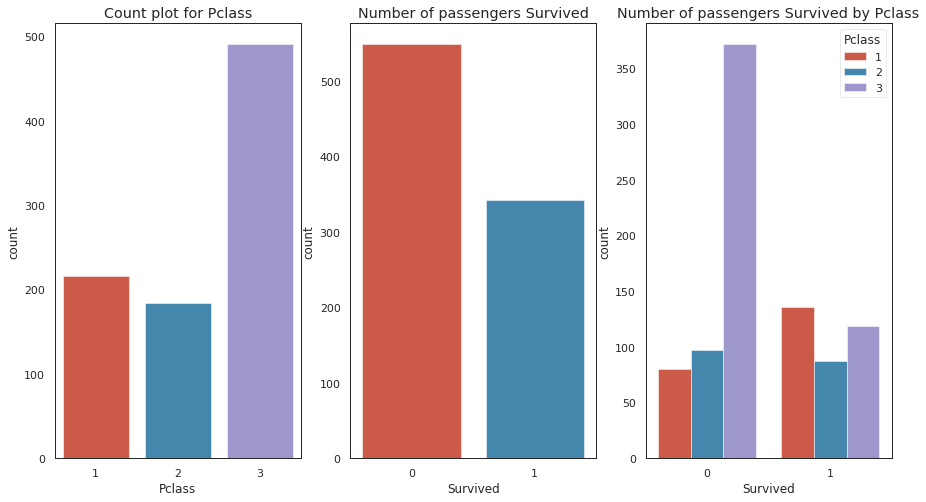

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.countplot(df_train.Pclass)
plt.title('Count plot for Pclass')

plt.subplot(1,3,2)
sns.countplot(df_train.Survived) # input DataFrame.Column name
plt.title('Number of passengers Survived')

plt.subplot(1,3,3)
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Number of passengers Survived by Pclass')

### Scatter Plot

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) Identify correlation between 2 features



#### **Survived vs Pclass vs Fare vs Age**

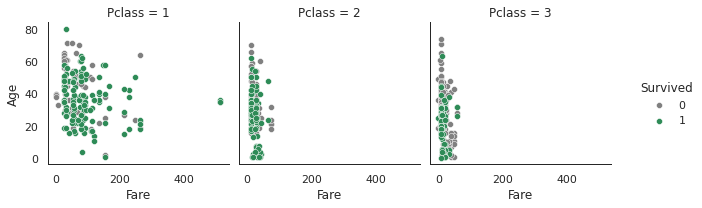

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}) 
g=g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend();

#### **Survived vs Pclass vs SibSp vs Parch**

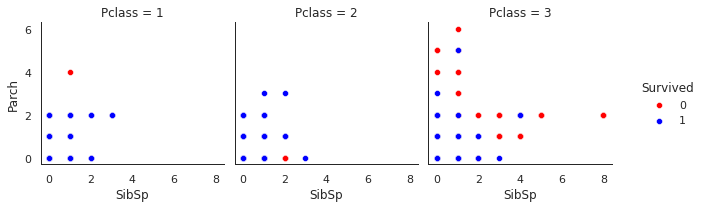

In [ ]:
f = sns.FacetGrid(df_train, hue='Survived', col='Pclass', margin_titles=True,
                  palette={1:'blue', 0:'red'})
f = f.map(plt.scatter, 'SibSp', 'Parch', edgecolor='w').add_legend();

### Box plot

This plot describes numerical/continuous values by their quartiles.

- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
<img src="https://miro.medium.com/max/13500/1*2c21SkzJMf3frPXPAR_gZA.png">


**Example**

![boxplot](https://i.imgur.com/Mcw6vXv.png)

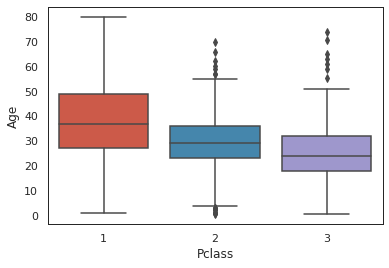

In [ ]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.show()
# Noise: delete rows or replace by min or max of that column

If there are noise or outliers, they can be replaced by Min or Max of those column's values.


### Histogram

<Figure size 432x288 with 0 Axes>

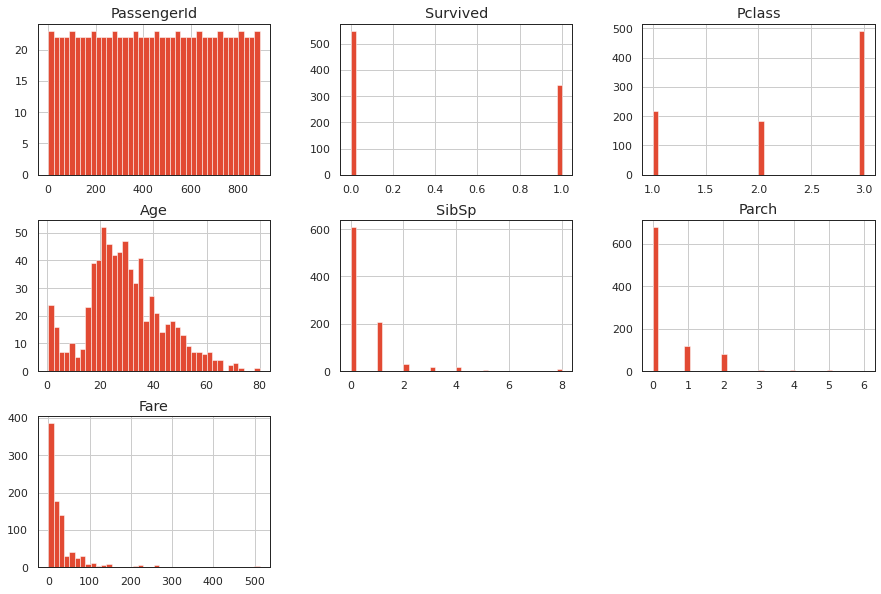

<Figure size 432x288 with 0 Axes>

In [ ]:
df_train.hist(figsize=(15,10),bins=40)
plt.figure()

### Correlation Heatmap

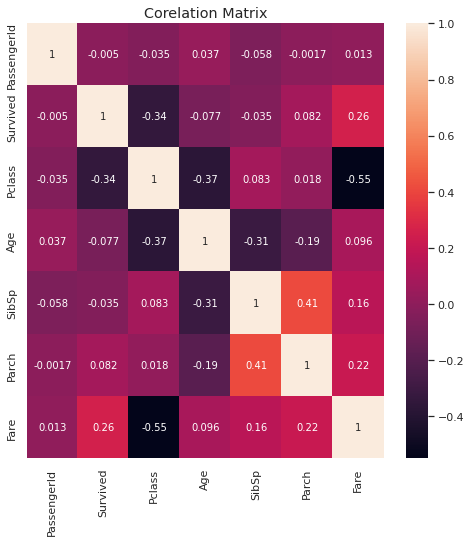

In [ ]:
# 1. Find correlation matrix using df.corr()
# 2. Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(), annot=True) # corr() only used for DataFrame
plt.title('Corelation Matrix');

## Data Preprocessing
**Data preprocessing** is to normalize, cleanse dataset before applying algorithms to it.
Common techniques of Data preprocessing:
* Preprocess imbalanced dataset
* Preprocess dataset with NaN values
* Preprocess noise (https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* Normalize dataset by Scaling (https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029) 
* Select features (https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b)

 ## Types of features

Features:
* Numerical 
* Categorical
* Datetime


### Check data type of each columns

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data exploration

In [ ]:
print(df_train.shape)

(891, 12)


>  <font color="red"><b>Note:</b></font>
how many NA elements in every column


In [ ]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Count Numm values per Column

Low classes are not indexed in the Cabin so there are many Null values. Only high classes have indices in the Cabin.

Location/Seat in the Cabin might be important for analysis. But preprocessing it could consume time a lot so in this project, I will remove it.

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Check null on df_train and df_test

In [ ]:
df_test.isnull()
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Remove columns

Drop 4 columns Embarked, PassengerId, Cabin, Ticket

In [ ]:
df_train = df_train.drop(columns = ['Embarked', 'PassengerId', 'Cabin', 'Ticket'])
df_test = df_test.drop(columns = ['Embarked', 'PassengerId', 'Cabin', 'Ticket'])

In [ ]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [ ]:
df_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


## Remove columns having NA

In [ ]:
# remove rows that have NA's
# df_test['Fare'] = df_test['Fare'].dropna() # incorrect
df_test.dropna(subset=['Fare'],inplace=True) # !!! must be a subset then input to the column name

In [ ]:
# Remove all rows having Nan
# df_test.dropna(inplace=True)

### Replace NA values by other values

Replace by Median or Average of that Class. Evaluate based on Heatmap.

Left: return location of Nulls in Age column. 

Right: group by Pclass, transform Nulls in Age by median Age of Pclass (because Pclass has the highest correlation with Age)

In [ ]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby("Pclass").Age.transform('median')

df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby("Pclass").Age.transform('median')

In [ ]:
df_train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
df_test.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False


In [ ]:
df_test.isnull().sum()

Pclass    0
Name      0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

## Feature transformations



I will transform features into new types so they could bring better outcome for analysis and decision making: 

1. Name

2. Age

3. SibSp & Parch

### **Transform Name**

In [ ]:
df_train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
df_train['Name'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Name'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
df_train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [ ]:
df_train.rename(columns={'Name' : 'Title'}, inplace=True)
df_train['Title'] = df_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
# Còn lại là Other                                      
df_test.rename(columns={'Name' : 'Title'}, inplace=True)
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [ ]:
df_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

### **Transform Age**

In [ ]:
# Gom nhóm 
bins = (0, 5, 12, 18, 25, 35, 60, 120)
group_names = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(df_train.Age, bins, labels=group_names)
df_train.Age = categories
df_test.Age = categories

In [ ]:
df_train.Age.value_counts()

Student        298
Adult          225
Young Adult    207
Teenager        70
Baby            44
Child           25
Senior          22
Name: Age, dtype: int64

### **Transform SibSp & Parch**

In [ ]:
# +1 means a person is counted
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
df_train = df_train.drop(columns=['SibSp','Parch'])
df_test = df_test.drop(columns=['SibSp','Parch'])

In [ ]:
df_train.FamilySize

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

## Feature Encoding

Apply One Hot Encoding for all categorical columns

In [ ]:
df_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,FamilySize
0,0,3,Mr,male,Student,7.2500,2
1,1,1,Mrs,female,Adult,71.2833,2
2,1,3,Miss,female,Young Adult,7.9250,1
3,1,1,Mrs,female,Young Adult,53.1000,2
4,0,3,Mr,male,Young Adult,8.0500,1


### **Encode Sex column**

In [ ]:
# One hot encoding for 2 values: label 0 and 1
df_train['Sex'] = df_train['Sex'].map({'male':1,'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1,'female':0})

In [ ]:
df_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,FamilySize
0,0,3,Mr,1,Student,7.2500,2
1,1,1,Mrs,0,Adult,71.2833,2
2,1,3,Miss,0,Young Adult,7.9250,1
3,1,1,Mrs,0,Young Adult,53.1000,2
4,0,3,Mr,1,Young Adult,8.0500,1


### **Encode other columns**

In [ ]:
# One hot encoding for more than 2 values: use get_dummies
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior
0,0,3,1,7.2500,2,0,0,1,0,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,1,0
2,1,3,0,7.9250,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,0
4,0,3,1,8.0500,1,0,0,1,0,0,0,0,0,0,1,0,0


## Prepare dataset

### Get the label y

In [ ]:
# 1. get y from column Suvived
# 2. drop column Survived
y = df_train.Survived
df_train = df_train.drop(columns=['Survived'])

In [ ]:
df_train.head(5)

,Pclass,Sex,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior
0,3,1,7.2500,2,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,1,0
2,3,0,7.9250,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,0
4,3,1,8.0500,1,0,0,1,0,0,0,0,0,0,1,0,0


### **Train / Validation Split**

In [ ]:
# TODO
# test_size=0.3 and stratify=y
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.3, stratify=y, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X val', X_val.shape)
print('Shape of y val', y_val.shape)

Shape of X train (623, 16)
Shape of y train (623,)
Shape of X val (268, 16)
Shape of y val (268,)


### **Feature Scaling (MinMaxScaler)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Before using MinMaxScaler, get that column and reshape it, then transform it
fares_train = np.array(X_train['Fare']).reshape(-1, 1)
fares_val = np.array(X_val['Fare']).reshape(-1, 1)
fares_test = np.array(df_test['Fare']).reshape(-1, 1)

X_train['Fare'] = scaler.fit_transform(fares_train)
X_val['Fare']= scaler.transform(fares_val)
df_test['Fare'] = scaler.transform(fares_test)

## 2D Visualization

### PCA decreases dimension - Method 1

Feasible but not the best method

In [ ]:
# 1. import PCA
# 2. Initializa pca with 2 components
# 3. Apply pca on X_train
# 3. Name the new variable df_pca
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components = 2) # 2D so number of components = 2
df_pca = pca.fit_transform(X_train)

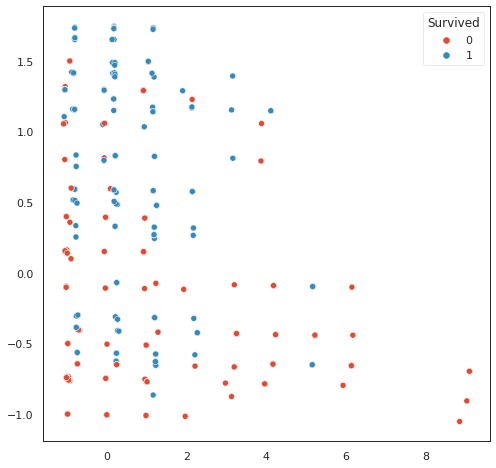

In [ ]:
plt.figure(figsize =(8, 8))
sns.scatterplot(df_pca[:,0], df_pca[:,1], hue=y_train, legend='full') # seaborn is more modern than matplotlib

In [ ]:
print(pca.explained_variance_ratio_)
# Retained data is now only 0.56 + 0.16 = 72%

[0.56122445 0.16031097]


### T-SNE decreases dimension to 2D - Method 2

Visualize the embedded Z vector

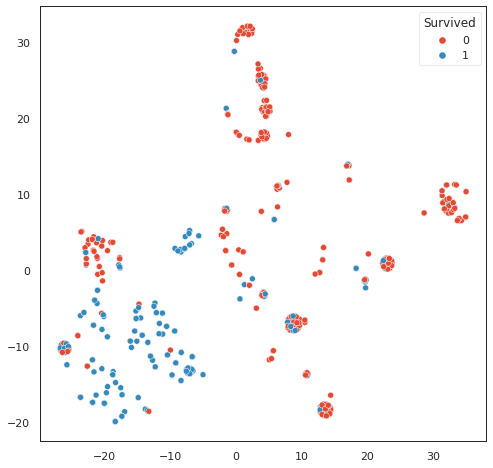

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
df_tsne = tsne.fit_transform(X_train)

plt.figure(figsize =(8, 8))
sns.scatterplot(df_tsne[:,0], df_tsne[:,1], hue=y_train, legend='full')

## Ensemble Model

A combination of different models

### Logistic Regression

In [ ]:
# 1. Define LogisticRegression model
# 2. Fit on Train
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit on both X train, y train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Classification: use the default accuracy score
# 1. Use score() function on 2 Set
print('Accuracy on Train Set: ', logreg.score(X_train, y_train))
print('Accuracy on Validation Set: ', logreg.score(X_val, y_val))

Accuracy on Train Set:  0.8443017656500803
Accuracy on Validation Set:  0.8059701492537313


Both accuracy values are not high. They can be correct on alive people, and incorrect on dead people. So I will draw Confusion Matrix to see the accuracy.

### Support Vector Machine

In [ ]:
C_values = [0.01, 0.1, 1] # 0.01 tới 10
gamma_values = [0.01, 0.1, 1]
kernel_values = ['linear', 'poly', 'rbf']

param_grid = {
    'kernel': kernel_values,
    'C': C_values,
    'gamma': gamma_values
}

In [ ]:
# 1. import SVC, GridSearchCV
# 3. create GridSearchCV with k-fold (cv) = 3
# 4. fit on Train Set 
# 5. get the best model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=1612)
grid = GridSearchCV(model, param_grid, cv=2)
grid.fit(X_train, y_train)

svc = grid.best_estimator_

In [ ]:
# # Use score() function on 2 Sets
# print('Accuracy on Train Set: ', model.score(X_train, y_train))
# print('Accuracy on Validation Set: ', model.score(X_val, y_val))

In [ ]:
print('Accuracy on Train Set: ', svc.score(X_train, y_train))
print('Accuracy on Validation Set: ', svc.score(X_val, y_val))

Accuracy on Train Set:  0.8507223113964687
Accuracy on Validation Set:  0.7910447761194029


### Decision Tree

In [ ]:
params = {
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,7],
    'min_samples_split': np.linspace(0.1, 1.0, 10), 
    'max_features':  ['auto', 'log2']
}
from sklearn.tree import DecisionTreeClassifier

decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=1612), params, cv=2, n_jobs=1)
decision_tree.fit(X_train, y_train)

# decision_tree = DecisionTreeClassifier(random_state=1612)
# decision_tree.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1612,
                                              splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                      

In [ ]:
# # Use score() function on 2 Sets
# print('Accuracy on Train Set: ', decision_tree.score(X_train, y_train))
# print('Accuracy on Validation Set: ', decision_tree.score(X_val, y_val))

Accuracy on Train Set:  0.9582664526484751
Accuracy on Validation Set:  0.8059701492537313


In [ ]:
# Use score() function on 2 Sets
print('Accuracy on Train Set: ', decision_tree.score(X_train, y_train))
print('Accuracy on Validation Set: ', decision_tree.score(X_val, y_val))

Accuracy on Train Set:  0.826645264847512
Accuracy on Validation Set:  0.7761194029850746


### Random Forest

In [ ]:
# 1. Import RandomForestClassifier
# 2. Create GridSearchCV with k-fold (cv) = 2
# 3. fit on Train Set 
# 4. get the best model
param_grid_random={'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7],
            'max_features': ['auto', 'log2'],
            'n_estimators': [100, 300, 500]}
 
from sklearn.ensemble import RandomForestClassifier 

random_forest = GridSearchCV(RandomForestClassifier(random_state=1612), params, cv=2, n_jobs=1)
random_forest.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# 1. Use score() function on 2 Sets
print('Accuracy on Train Set: ', random_forest.score(X_train, y_train))
print('Accuracy on Validation Set: ', random_forest.score(X_val, y_val))

Accuracy on Train Set:  0.8491171749598716
Accuracy on Validation Set:  0.7985074626865671


### Voting Classifier

voting = {'hard', 'soft'}

If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
                              ('Logistic Regression', logreg), 
                              ('SVM', svc), 
                              ('Decision Tree', decision_tree)],
                            voting='hard',
                            n_jobs=-1) # hard: label which has many ones can be returned # ('Random Forest', random_forest)

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=No...
                                                                            splitter='best'),
                

In [ ]:
# Use score() function on 2 Sets
print('Accuracy on Train Set: ', ensemble.score(X_train, y_train))
print('Accuracy on Validation Set: ', ensemble.score(X_val, y_val))

Accuracy on Train Set:  0.8491171749598716
Accuracy on Validation Set:  0.7873134328358209


### **Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

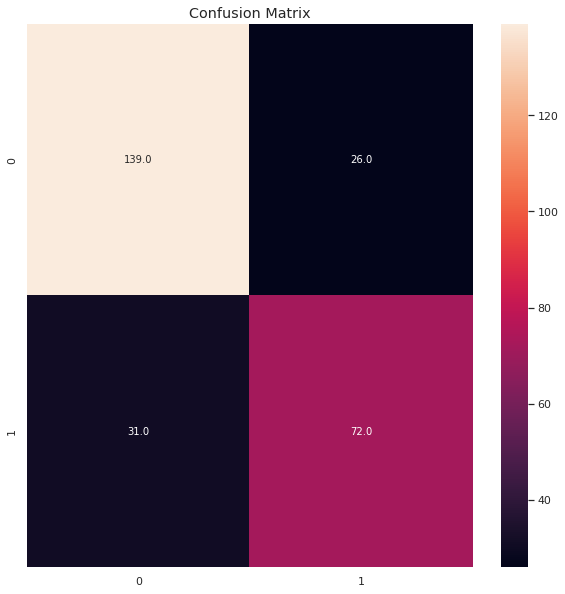

In [ ]:
# 1. Import confusion matrix from sklearn
# 2. Use confusion_matrix to draw a heatmap
# 3. if your heatmap show 8e+2 numbers. Insise heatmap() function, put a parameter fmt='.1f'  
from sklearn.metrics import confusion_matrix
y_pred = ensemble.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.1f')
plt.title('Confusion Matrix')